In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score , validation_curve , GridSearchCV ,learning_curve , GroupKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder , LabelBinarizer , OneHotEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler , RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer, KNNImputer  # c'est pour enlever les valeur manquante
import seaborn as sns


In [6]:
# Charger le dataset depuis le fichier Excel
file_path = 'dataset.xlsx'
data = pd.read_excel(file_path)
data.head()
# Afficher les premières lignes du dataset


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = data.copy()

In [11]:
df.shape #visualiser la taille de la matrice 

(5644, 111)

In [14]:
df.dtypes.value_counts() #comter_le_nombre_de_type_de_variable

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

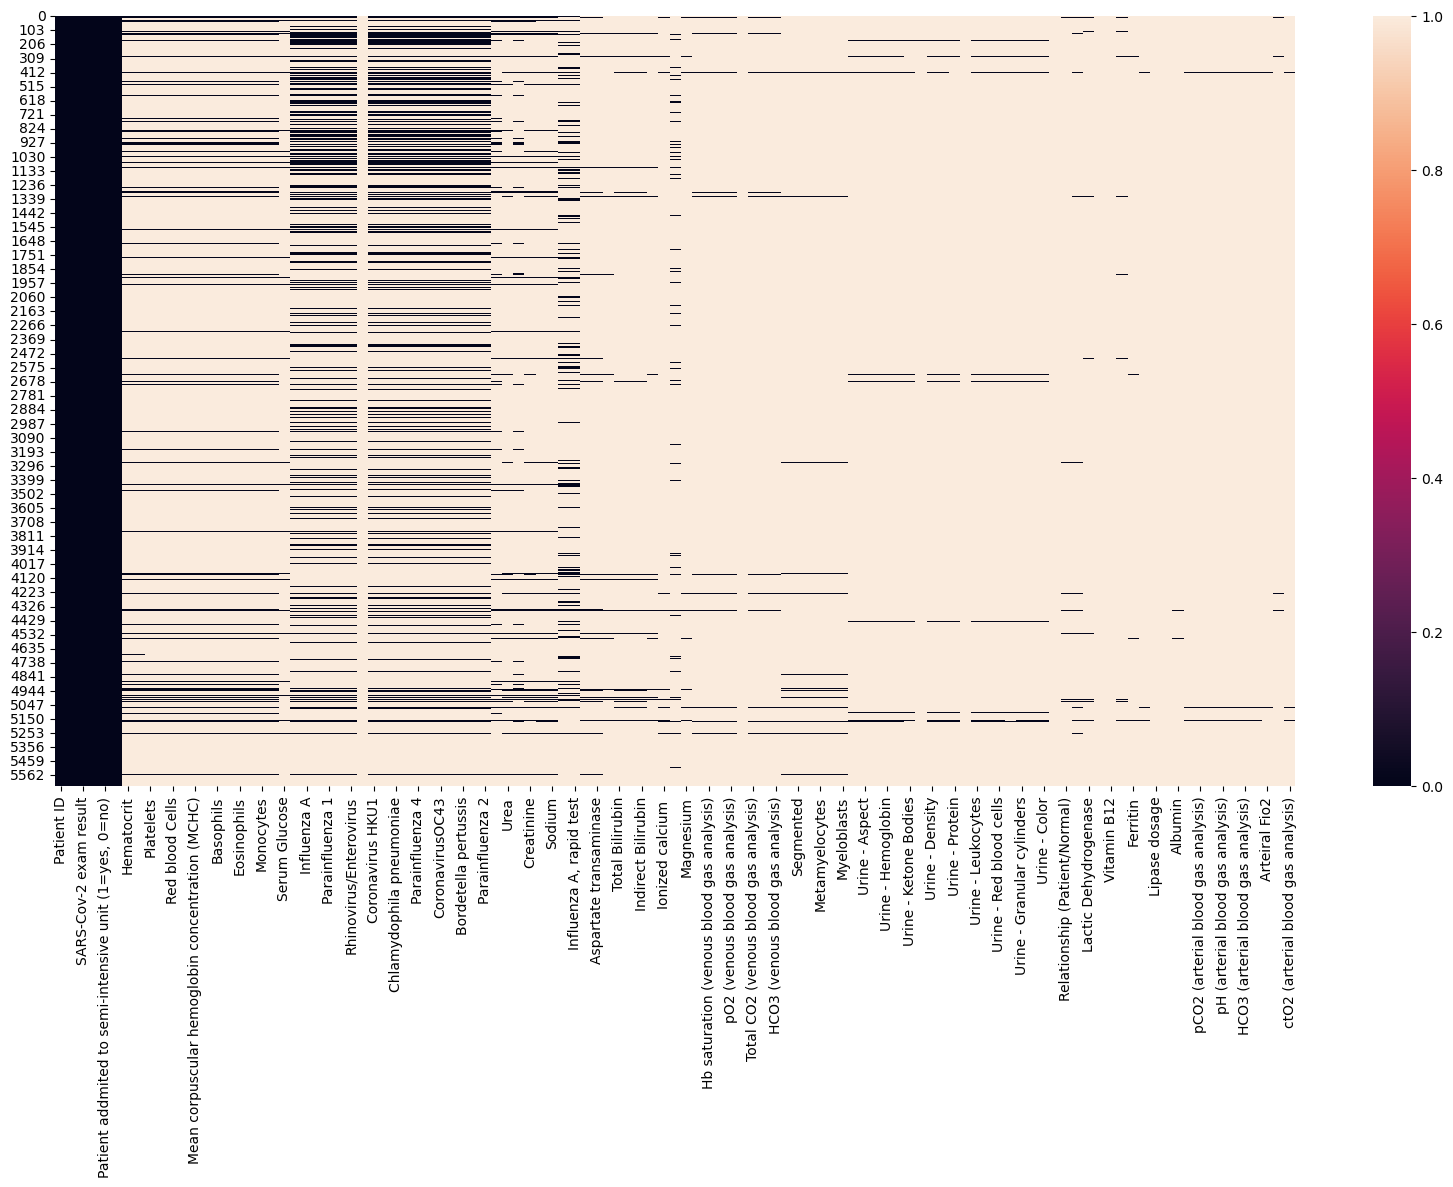

In [16]:
#affiche_valeur_maquante_sous_forme_image
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [18]:
#pourcentage_des_valeurs_manquantes_
df.isna().sum()/111

Patient ID                                                0.000000
Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
                                                           ...    
HCO3 (arterial blood gas analysis)                       50.603604
pO2 (arterial blood gas analysis)                        50.603604
Arteiral Fio2                                            50.666667
Phosphor                                                 50.666667
ctO2 (arterial blood gas analysis)                       50.603604
Length: 111, dtype: float64